In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report


D:\Users\HAYLEY\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


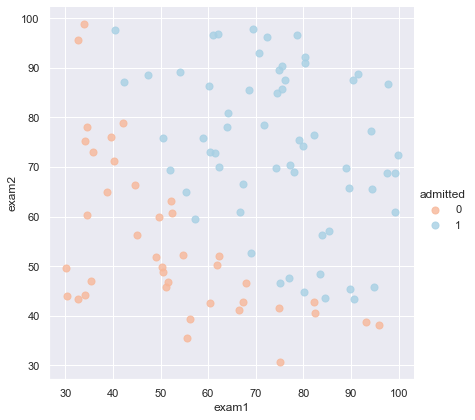

In [2]:
data = pd.read_csv('ex2data1.txt',names = ['exam1','exam2','admitted'])
sns.set(context='notebook',style='darkgrid',palette=sns.color_palette('RdBu',2))
sns.lmplot('exam1','exam2',hue = 'admitted',data=data,size=6,fit_reg=False,scatter_kws={'s':50})
plt.show()

In [3]:
def get_X(df):
    ones = pd.DataFrame({'ones':np.ones(len(df))})
    data = pd.concat([ones,df],axis=1)
    return data.iloc[:,:-1].values

def get_y(df):
    return np.array(df.iloc[:,-1])

def normalize_features(df):
    return df.apply(lambda column:(column-column.mean())/column.std())

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
X = get_X(data)
y = get_y(data)
print(X.shape,y.shape)

(100, 3) (100,)


In [5]:
theta = np.zeros(3)

def cost(theta,X,y):
    return np.mean(-y*np.log(sigmoid(X@theta))-(1-y)*np.log(1-sigmoid(X@theta)))

cost(theta,X,y)

0.6931471805599453

In [6]:
def gradient(theta,X,y):
    return (1/len(X))*X.T@(sigmoid(X@theta)-y)

gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

In [7]:
import scipy.optimize as opt
# 寻找参数
#----------------------------------------
res = opt.minimize(fun=cost,x0=theta,args=(X,y),method='Newton-CG',jac=gradient)

In [8]:
res

     fun: 0.2035622654057942
     jac: array([ 0.00015127, -0.00338608, -0.00272924])
 message: 'Optimization terminated successfully.'
    nfev: 63
    nhev: 0
     nit: 25
    njev: 209
  status: 0
 success: True
       x: array([-24.5097847 ,   0.20102281,   0.19619693])

In [9]:
def predict(X,theta):
    prob = sigmoid(X@theta)
    return (prob>=0.5).astype(int)

In [10]:
final_theta = res.x
y_pred = predict(X,final_theta)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



## 寻找决策边界

In [11]:
print(res.x)
# 变换空间
coef = -(res.x/res.x[2])
print(coef)

x = np.arange(130,step=0.1)
y = coef[0] + coef[1]*x

[-24.5097847    0.20102281   0.19619693]
[124.92440478  -1.02459712  -1.        ]


D:\Users\HAYLEY\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


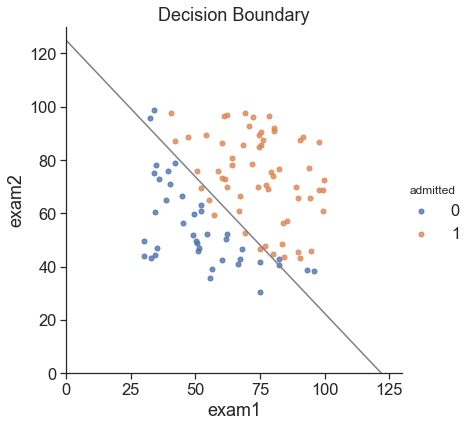

In [12]:
sns.set(context = 'notebook',style='ticks',font_scale=1.5)
sns.lmplot('exam1','exam2',hue='admitted',data=data,size=6,fit_reg=False,scatter_kws={'s':25})
plt.plot(x,y,'grey')
plt.xlim(0,130)
plt.ylim(0,130)
plt.title('Decision Boundary')
plt.show()

## 正则化逻辑回归

In [13]:
df = pd.read_csv('ex2data2.txt',names=['test1','test2','accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


D:\Users\HAYLEY\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


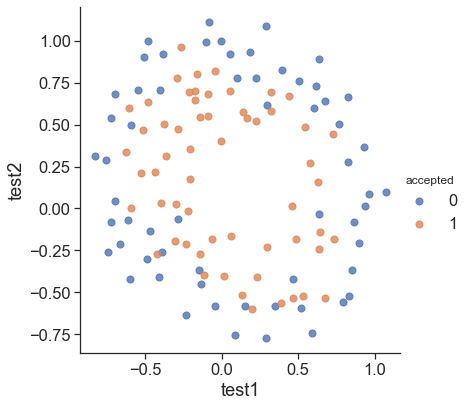

In [14]:
sns.set(context='notebook',style='ticks',font_scale=1.5)
sns.lmplot('test1','test2',hue='accepted',data=df,size=6,fit_reg=False,scatter_kws={'s':50})
plt.show()

#### 特征映射

In [15]:
# 原始x1，x2 映射多加x1^2,x2^2,x1^2x2……
def feature_mapping(x,y,power,as_ndarray=False):
    data = {'f{}{}'.format(i-p,p):np.power(x,i-p)*np.power(y,p)
            for i in np.arange(power+1) for p in np.arange(i+1)
    }
    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

x1 = np.array(df.test1)
x2 = np.array(df.test2)

data = feature_mapping(x1,x2,power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


#### 正则化函数

In [16]:
theta = np.zeros(data.shape[1])
X = feature_mapping(x1,x2,power=6,as_ndarray=True)
print(X.shape)

y=get_y(df)
print(y.shape)

(118, 28)
(118,)


In [17]:
def regularized_cost(theta,X,y,l=1):
    theta_j1_to_n = theta[1:]
    regularized_term = (l/(2*len(X)))*np.power(theta_j1_to_n,2).sum()
    return cost(theta,X,y)+regularized_term
    
regularized_cost(theta,X,y,l=1)

0.6931471805599454

#### 正则化梯度

In [18]:
def regularized_gradient(theta,X,y,l=1):
    theta_j1_to_n = theta[1:]
    regularized_theta = (l/len(X))*theta_j1_to_n

    # by doing this, no offset is on theta_0
    regularized_term = np.concatenate([np.array([0]),regularized_theta])
    return gradient(theta,X,y)+regularized_term

regularized_gradient(theta,X,y)


array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

#### 拟合标记

In [22]:
res = opt.minimize(fun=regularized_cost,x0=theta,args=(X,y),method='Newton-CG',jac=regularized_gradient)
print(res)

     fun: 0.5290027297128146
     jac: array([-4.74441053e-08,  2.40794528e-08,  6.81914493e-08,  5.35595684e-08,
       -1.01777198e-08, -3.11230623e-08,  3.89474774e-08,  2.85347248e-08,
        7.54484406e-09,  1.33097126e-08, -1.52321848e-08, -9.45300811e-09,
       -3.18383298e-08, -5.61947185e-10, -2.54352150e-08,  2.32671225e-08,
        1.90956839e-08, -1.15438545e-08, -2.30002231e-09,  6.91951472e-09,
       -1.32521340e-08, -4.51777374e-09, -7.25661826e-10, -1.66822120e-08,
       -8.41820296e-09, -1.17011615e-08, -2.48761839e-09, -2.39801496e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 66
  status: 0
 success: True
       x: array([ 1.27273945,  0.62527089,  1.18108818, -2.01995871, -0.91742465,
       -1.4316643 ,  0.12400743, -0.36553349, -0.35723886, -0.17513026,
       -1.45815922, -0.05098987, -0.61555765, -0.27470659, -1.19281659,
       -0.24218782, -0.20600513, -0.04473168, -0.27778501, -0.29537747,
       -0.4

In [23]:
final_theta = res.x
y_pred = predict(X,final_theta)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



#### 使用不同的 $\lambda$ 画出决策边界

D:\Users\HAYLEY\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
<ipython-input-24-5d5130402911>:34: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  plt.scatter(x,y,c='R',s=10)


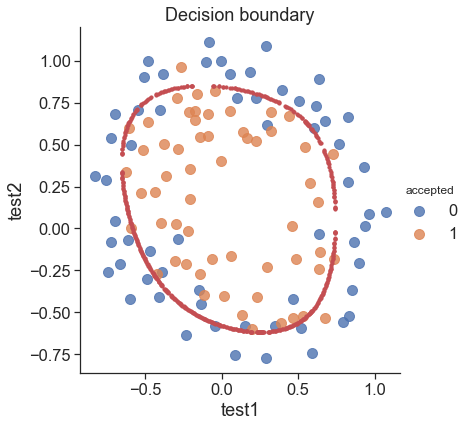

In [24]:
def feature_mapped_logistic_regression(power,l):
    df = pd.read_csv('ex2data2.txt',names=['test1','test2','accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)

    X = feature_mapping(x1,x2,power,as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun = regularized_cost,x0=theta,args=(X,y,l),method='TNC',jac=regularized_gradient)
    final_theta = res.x
    return final_theta

def find_decision_boundary(density,power,theta,threshhold):
    t1 = np.linspace(-1,1.5,density)
    t2 = np.linspace(-1,1.5,density)

    cordinates = [(x,y) for x in t1 for y in t2]
    x_cord,y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord,y_cord,power)
    inner_product = mapped_cord.values @ theta
    decision = mapped_cord[np.abs(inner_product)<threshhold]
    return decision.f10,decision.f01

def draw_boundary(power,l):
    density = 1000
    threshhold = 2*10**-3

    final_theta = feature_mapped_logistic_regression(power,l)
    x,y = find_decision_boundary(density,power,final_theta,threshhold)

    df = pd.read_csv('ex2data2.txt',names = ['test1','test2','accepted'])
    sns.lmplot('test1','test2',hue='accepted',data=df,size=6,fit_reg=False,scatter_kws={'s':100})
    plt.scatter(x,y,c='R',s=10)
    plt.title('Decision boundary')
    plt.show()

draw_boundary(power=6,l=1)

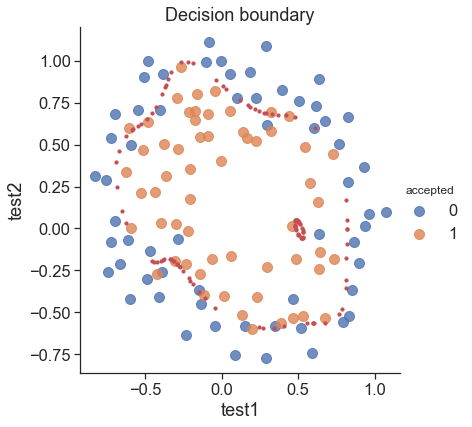

In [25]:
draw_boundary(power=6, l=0) 

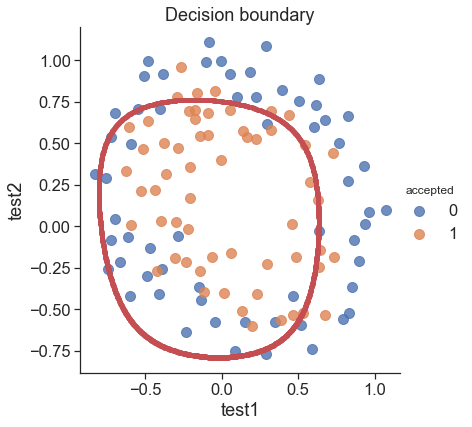

In [27]:
draw_boundary(power=6, l=20) 